This notebook contains exploratory code for [Human Grasping dataset](http://grasp.xief.net/) and further analysis following the paper ["Extracting Postural Synergies for Robotic Grasping"](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.590.3511&rep=rep1&type=pdf).

HTML of the notebook has been provided together with the notebook for better viewing on notebook. Recommend actually running the notebook for better interactive visualisation. Also use the notebook with Collapsible Heading (jupyter_nbextensions) for better viewing.

### Imports and Defaults

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d as p3
import matplotlib.animation as animation

In [ ]:
from pyquaternion import Quaternion

In [ ]:
from pathlib import Path
from scipy.io import loadmat

In [ ]:
data_path = Path('data')

In [ ]:
list(data_path.iterdir())

In [ ]:
annots = loadmat(data_path/'coordinates600_quat.mat')

## Explore data

In [ ]:
annots.keys()

In [ ]:
annots['__header__']

In [ ]:
annots['__version__']

In [ ]:
annots['__globals__']

In [ ]:
gdata = annots['coordinates']; gdata.shape

- 5 subjects
- 2 trials
- 31 grasp types
- 600 samples
- 35 quarternions (rotation matrix). Index - Thumb - Wrist(Presetn in raw) - Middle - Ring - Little. 7 each.
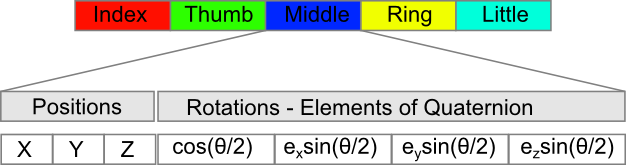

In [ ]:
datapt = gdata[0][0][0][0]; datapt.shape

In [ ]:
index_datapt = datapt[:7]; index_datapt

## Visualize data

### Single Element

In [ ]:
d = gdata[0][0][0][0][:7]

In [ ]:
q = Quaternion(gdata[0][0][0][0][3:7]); q

In [ ]:
q.rotate([1, 0, 0])

In [ ]:
x, y, z = d[0], d[1], d[2]
u, v, w = q.rotate([1, 0, 0])

In [ ]:
soa = np.array([[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, u, v, w)
plt.show()

### Motion visualisatoin

In [ ]:
%matplotlib widget

In [ ]:
d = gdata[0][0][0]; d.shape

In [ ]:
fig = plt.figure(figsize = (6, 6))
ax = fig.gca(projection='3d')
label = ['index', 'thumb', 'middle', 'ring', 'little']
color = ['red', 'green', 'blue', 'yellow', 'aqua']
for i in range(5):
    x, y, z = d[:, 7*i], d[:, 7*i+1], d[:, 7*i+2]
    ax.scatter(x, y, z, label = label[i], color = color[i])
ax.legend()
plt.show()

In [ ]:
%matplotlib widget
def update_graph(num):
    for i, g in enumerate(graph):
        g._offsets3d = (data[i, 0, :num], data[i, 1, :num], data[i, 2, :num])
    title.set_text('3D Test, time={}'.format(num))

label = ['index', 'thumb', 'middle', 'ring', 'little']
color = ['red', 'green', 'blue', 'yellow', 'aqua']
    
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data = gdata[0][0][0].T.reshape((5, 7, 600))
graph = [ax.scatter(d[0, :1], d[1, :1], d[2, :1], color=color[i], label=label[i]) for i, d in enumerate(data)]

ax.set_xlim3d([-10.0, 10.0])
ax.set_xlabel('X')

ax.set_ylim3d([-6.0, 10.0])
ax.set_ylabel('Y')

ax.set_zlim3d([3.0, 12.0])
ax.set_zlabel('Z')

ax.set_title('Movment visualisation')
ax.legend()

ani = animation.FuncAnimation(fig, update_graph, 600, 
                               interval=10, blit=False)

plt.show()

In [ ]:
ani.event_source.stop()
plt.close()

In [ ]:
def update_graph(num):
    global graph
    for g in graph:
        g.remove()

    graph = [ax.quiver(x[i, num-1], y[i, num-1], z[i, num-1], *orient[i, :, num-1], color=color[i], label=label[i]) for i in range(5)]

    title.set_text('3D Test, time={}'.format(num))

label = ['index', 'thumb', 'middle', 'ring', 'little']
color = ['red', 'green', 'blue', 'orange', 'aqua']

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

def display(subject, trial, grasp_type):
    global x, y, z, orient
    data = gdata[subject][trial][grasp_type].reshape((600, 5, 7))
    x = data[:, :, 0].T
    y = data[:, :, 1].T
    z = data[:, :, 2].T
    orient = np.array(([[Quaternion(d[3:]).rotate([0, 0, 2]) for d in da] for da in data]))
    orient = orient.transpose(1, 2, 0)

display(0, 0, 0)

graph = [ax.quiver(x[i, 0], y[i, 0], z[i, 0], *orient[i, :, 0], color=color[i], label=label[i]) for i in range(5)]

ax.set_xlim3d([-10.0, 10.0])
ax.set_xlabel('X')

ax.set_ylim3d([-6.0, 10.0])
ax.set_ylabel('Y')

ax.set_zlim3d([3.0, 12.0])
ax.set_zlabel('Z')

ax.set_title('Movment visualisation')
ax.legend()

ani = animation.FuncAnimation(fig, update_graph, 600, 
                               interval=10, blit=False)

plt.show()

In [ ]:
display(1, 0, 29)

(subjects, trials, grasp types)
- 5 subjects(0-4)
- 2 trials(0-1)
- 30 grasp types(http://grasp.xief.net/documents/taxonomy.pdf) (Not present: -Distal type(19) -Tripod Variation(21))

In [ ]:
ani.event_source.stop()
plt.close()

## Telescopic arm and gripper

In [ ]:
import numpy as np
import math

In [ ]:
%matplotlib inline

In [ ]:
samples = 100
noisefactor = 100 #increase to decrease noise

In [ ]:
for _ in range(10):
    X = np.array(range(0, samples)) / samples / 10
    eps0, eps1 = np.random.randn(samples)/noisefactor, np.random.randn(samples)/noisefactor
    Y = np.array([eps1[i] + math.pow(.1-X[i], (1/3) + eps0[i]) for i  in range(samples)])
    plt.plot(X, Y)
plt.show()

## PCA Analysis

In [ ]:
train_data, test_data = gdata[:, 0], gdata[:, 1]

In [ ]:
dt = train_data.reshape((-1, 35))
dy = test_data.reshape((-1, 35))

In [ ]:
dt.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(dt)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.singular_values_

In [ ]:
x_dt = pca.transform(dt)
ix_dt = pca.inverse_transform(x_dt)

In [ ]:
dt

In [ ]:
ix_dt

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(dt)

In [ ]:
x_dt = pca.transform(dt)
ix_dt = pca.inverse_transform(x_dt)

In [ ]:
dt

In [ ]:
ix_dt

In [ ]:
%matplotlib inline

In [ ]:
plt.scatter(x_dt[:, 0], x_dt[:, 1], s = .1)

In [ ]:
x_dt.shape

In [ ]:
trial4 = test_data[:, 3]

In [ ]:
x_trial4 = pca.transform(trial4.reshape(-1, 35)).reshape(5, 600, 2)

In [ ]:
from matplotlib.pyplot import cm

In [ ]:
color=cm.rainbow(np.linspace(0,1,5))

In [ ]:
for i in range(5): 
    plt.plot(x_trial4[i , :, 0], x_trial4[i , :, 1], color=color[i], label=i)
    plt.scatter(x_trial4[i , 0, 0], x_trial4[i , 0, 1], color=color[i])
    plt.scatter(x_trial4[i , -1, 0], x_trial4[i , -1, 1], color=color[i], marker='s')
plt.legend()

In [ ]:
plt.scatter(x_dt[:, 0], x_dt[:, 1], s = .001)
for i in range(5): 
    plt.plot(x_trial4[i , :, 0], x_trial4[i , :, 1], label=i)
plt.legend()